# Import

In [1]:
#First we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set ()
import scipy
import scipy.stats
import statistics

In [2]:
#we load the data set
df = pd.read_csv("seismic-bumps.csv")

In [3]:
#We show the dataset
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#An array of the column names
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [5]:
# Convert categorical features in numerical values ('a', 'b', 'c', 'd' --> 0, 1, 2, 3)

# change the type of the column in categorical
df.seismic = pd.Categorical(df.seismic)
df.seismoacoustic = pd.Categorical(df.seismoacoustic)
df['shift'] = pd.Categorical(df['shift'])
df.hazard = pd.Categorical(df.hazard)

# convert category in numerical value
df.seismic = df.seismic.cat.codes
df.seismoacoustic = df.seismoacoustic.cat.codes
df['shift'] = df['shift'].cat.codes
df.hazard = df.hazard.cat.codes

In [6]:
# Show the dataset with updated values
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0,0,0,0,0
2580,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0,0,0,0,0
2581,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0,0,0,0,0
2582,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,0,0


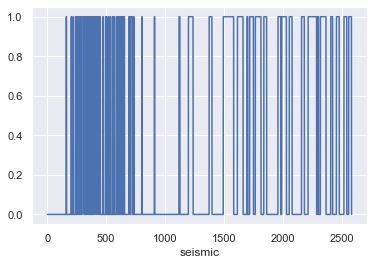

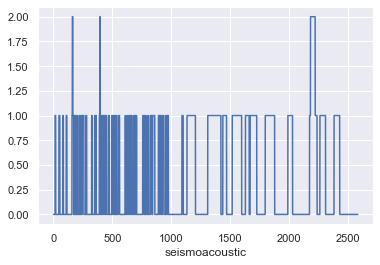

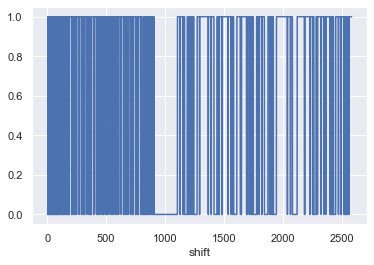

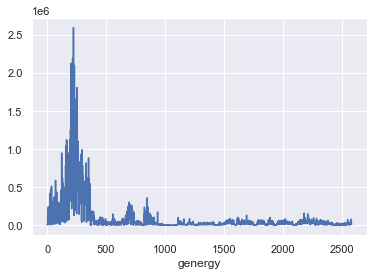

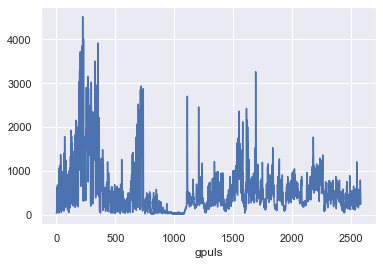

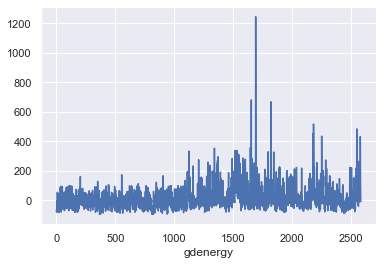

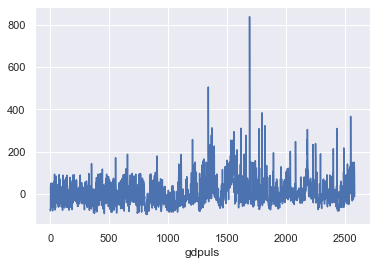

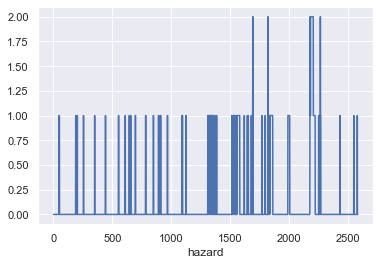

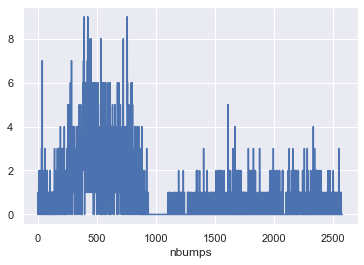

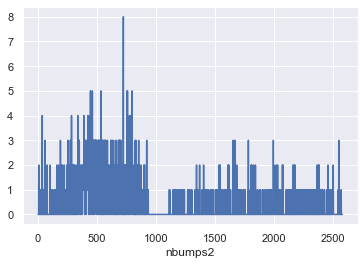

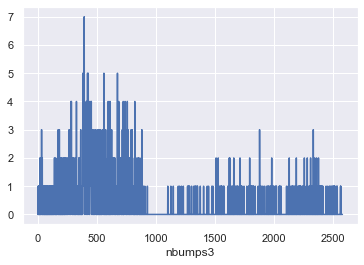

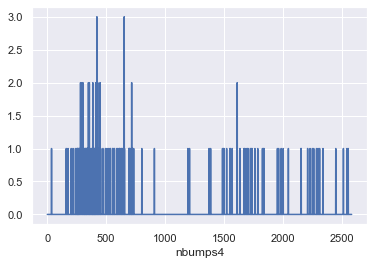

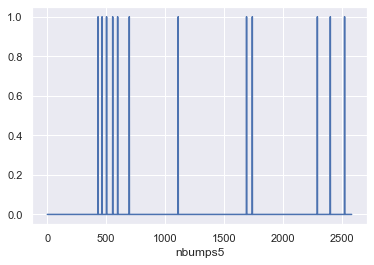

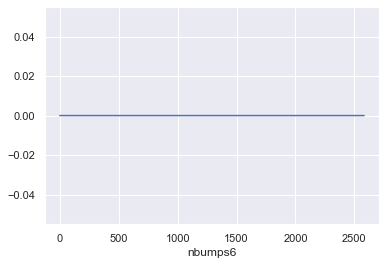

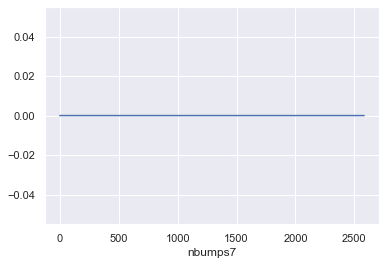

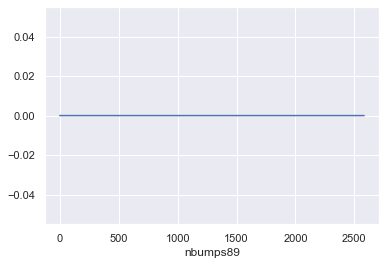

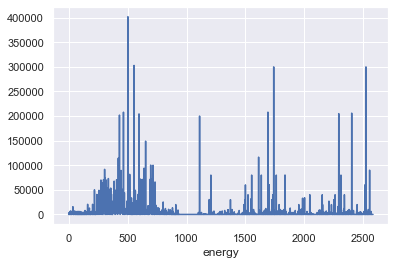

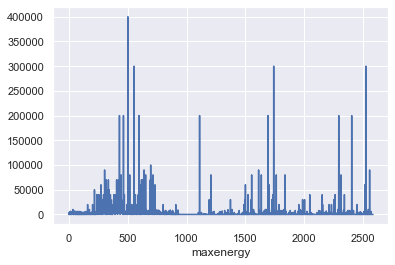

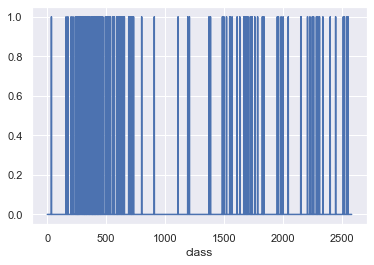

In [7]:
#we make a plot for every columns to visualize the data and see possible correlations
for column in df.head():
    plt.plot(df[column])
    plt.xlabel(column)
    plt.show()

In [8]:
from MHP import MHP

# Numerical variables

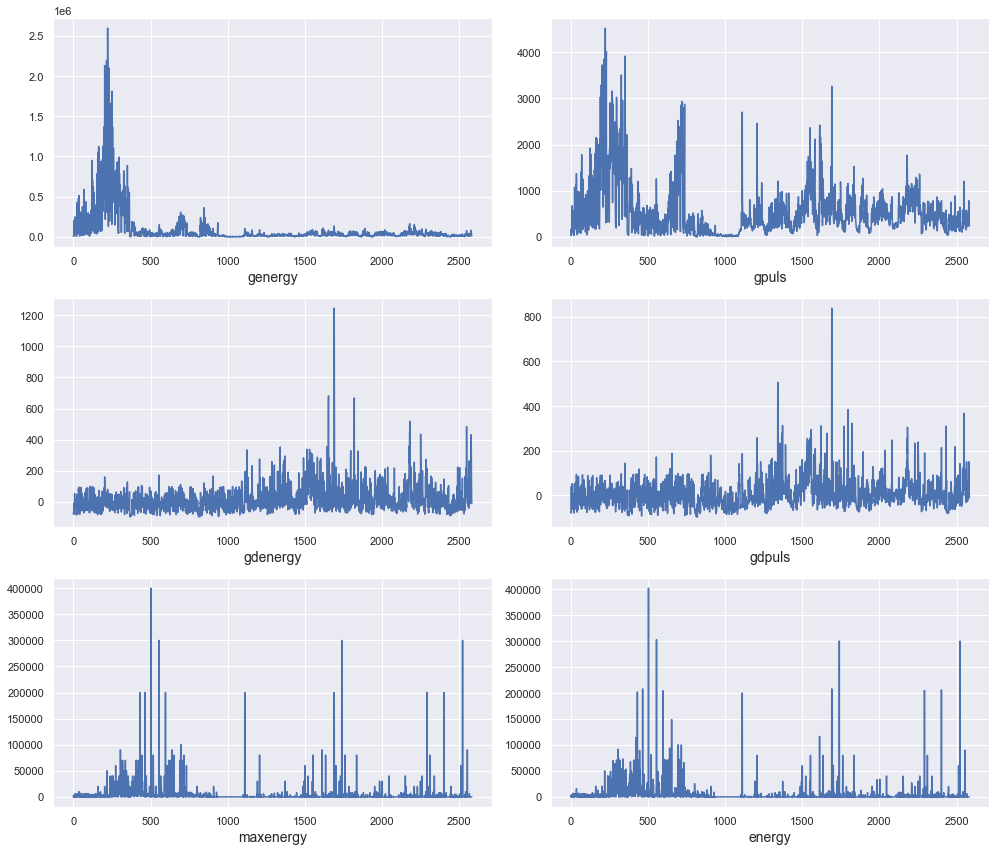

In [9]:
# making histogram plots for numerical variables (genergy, gpuls, gdenergy, gdpuls, energy, maxenergy)
fig, ax = plt.subplots(3,2, figsize=(14,12))

ax[0,0].plot(df["genergy"])
ax[0,0].set_xlabel("genergy",fontsize=14)
ax[0,1].plot(df["gpuls"])
ax[0,1].set_xlabel("gpuls",fontsize=14)
ax[1,0].plot(df["gdenergy"])
ax[1,0].set_xlabel("gdenergy",fontsize=14)
ax[1,1].plot(df["gdpuls"])
ax[1,1].set_xlabel("gdpuls",fontsize=14)
ax[2,1].plot(df["energy"])
ax[2,1].set_xlabel("energy",fontsize=14)
ax[2,0].plot(df["maxenergy"])
ax[2,0].set_xlabel("maxenergy",fontsize=14)

fig.tight_layout()
plt.show()

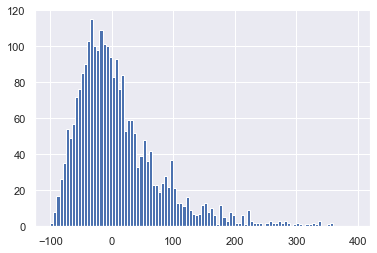

In [10]:
plt.hist(df["gdenergy"], bins=np.arange(-100,400,5))
plt.show()

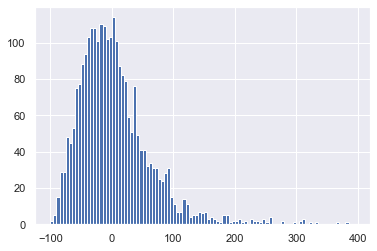

In [11]:
h=plt.hist(df["gdpuls"], bins=np.arange(-100,400,5))
plt.show()

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [13]:
print(skew(df["gdpuls"]))
print(kurtosis(df["gdpuls"]))

2.5573413733532364
17.335830017618417


In [14]:
df.corr(method='pearson')

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
seismic,1.000000,0.058114,0.268667,0.016017,0.243636,0.142308,0.156397,0.097272,0.127171,0.066301,0.068249,0.241264,0.021627,NaN,NaN,NaN,0.151417,0.136878,0.090574
seismoacoustic,0.058114,1.000000,0.081082,0.008681,0.090666,0.184654,0.207776,0.460687,0.017083,0.023355,0.005500,0.001981,0.012021,NaN,NaN,NaN,-0.008072,-0.008152,0.008251
shift,0.268667,0.081082,1.000000,0.216942,0.435734,0.097382,0.108915,0.054115,0.311292,0.278907,0.213955,0.151681,0.003293,NaN,NaN,NaN,0.106842,0.087754,0.142079
genergy,0.016017,0.008681,0.216942,1.000000,0.748020,0.048514,0.071554,-0.035594,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gpuls,0.243636,0.090666,0.435734,0.748020,1.000000,0.293036,0.382906,0.107733,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.142308,0.184654,0.097382,0.048514,0.293036,1.000000,0.811944,0.317974,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.156397,0.207776,0.108915,0.071554,0.382906,0.811944,1.000000,0.310119,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
hazard,0.097272,0.460687,0.054115,-0.035594,0.107733,0.317974,0.310119,1.000000,-0.051151,-0.014489,-0.070216,-0.017897,0.012241,NaN,NaN,NaN,-0.023127,-0.016938,-0.017744
nbumps,0.127171,0.017083,0.311292,0.220720,0.300923,0.030039,0.057996,-0.051151,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
nbumps2,0.066301,0.023355,0.278907,0.143587,0.207390,0.041246,0.051106,-0.014489,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381


In [15]:
#to drop columns
df.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], inplace=True)

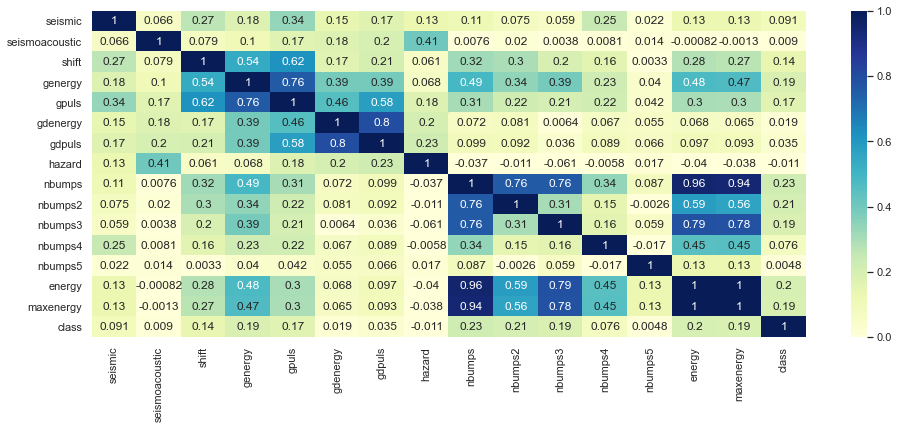

In [16]:
# Correlation Heatmap spearman
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='spearman'), vmin=0, vmax=1, annot=True, cmap='YlGnBu')

In [17]:
size = 30000
x = np.arange(size)
y = scipy.int_(np.round_(scipy.stats.vonmises.rvs(5,size=size)*47))


C:\Users\marco\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\marco\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\marco\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


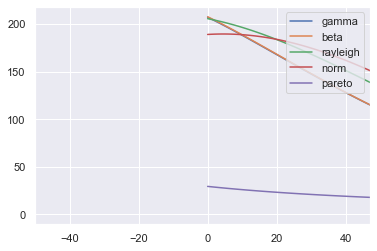

In [18]:
dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(df["gdpuls"])
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(-50,47)
plt.legend(loc='upper right')
plt.show()

In [19]:
denergy=df["energy"]-statistics.mean(df["energy"])

In [20]:
statistics.mean(df["energy"])

4975.270897832817

In [21]:
print(max(denergy))

397024.7291021672


In [22]:
print(min(denergy))

-4975.270897832817


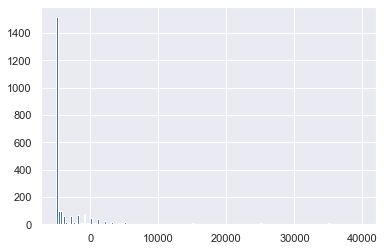

In [23]:
plt.hist(denergy, bins=np.arange(-5000,40000,250))
plt.show()

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


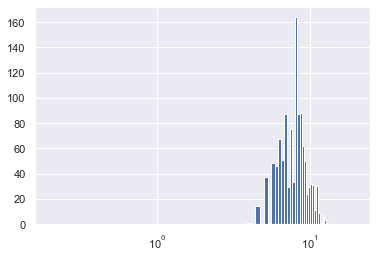

In [24]:
plt.hist(np.log(df["energy"]), bins=np.arange(-1,20,0.3))
plt.xscale("log")
plt.show()

In [25]:
P = MHP()
P.generate_seq(60)

Max eigenvalue: 0.50000


C:\Users\marco\Documents\sistemi-complessi\MHP.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.data = np.array(self.data)


array([[0.48826954219586316, array([0])],
       [2.336154393302167, array([0])],
       [4.54024819960236, array([0])],
       [6.161145614627339, array([0])],
       [6.444401046340177, array([0])],
       [18.714737219254097, array([0])],
       [22.56990345962689, array([0])],
       [30.4954643141546, array([0])],
       [31.36880693775998, array([0])],
       [49.67525328828976, array([0])],
       [49.789712311756944, array([0])]], dtype=object)

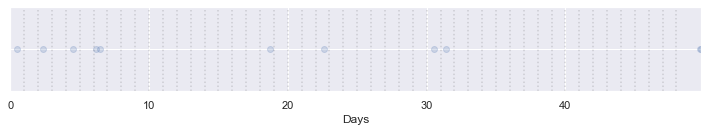

In [26]:
P.plot_events()

Max eigenvalue: 0.10000


C:\Users\marco\Documents\sistemi-complessi\MHP.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.data = np.array(self.data)


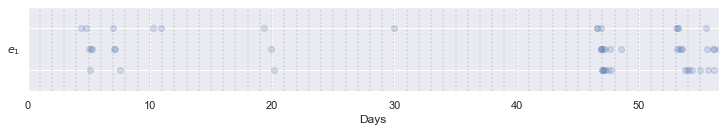

In [27]:
m = np.array([0.2, 0.0, 0.0])
a = np.array([[0.1, 0.0, 0.0], 
              [0.9, 0.0, 0.0],
              [0.0, 0.9, 0.0]])
w = 3.1

P = MHP(mu=m, alpha=a, omega=w)
P.generate_seq(60)
P.plot_events()

In [28]:
mhat = np.random.uniform(0,1, size=3)
ahat = np.random.uniform(0,1, size=(3,3))
w = 3.

P.EM(ahat, mhat, w)

After ITER 0 (old: -10000.000 new: 0.050)
 terms 32.0227, 22.5720, 29.4280
After ITER 10 (old: 0.050 new: -0.556)
 terms 13.4853, 9.6018, 42.3982
Reached stopping criterion. (Old: -0.556 New: -0.554)


(array([[3.14242968e-01, 7.16233661e-08, 2.70217611e-14],
        [1.16328331e+00, 1.05761825e-01, 1.46649139e-01],
        [2.56607991e-05, 6.66244877e-01, 1.76970490e-01]]),
 array([1.69886533e-01, 4.60914225e-12, 5.64721915e-15]))

In [29]:
df["class"]

0       0
1       0
2       0
3       0
4       0
       ..
2579    0
2580    0
2581    0
2582    0
2583    0
Name: class, Length: 2584, dtype: int64

In [34]:
P

In [46]:
a=df.iloc[:,15].values

In [47]:
a

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0,0
2580,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0,0
2581,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0,0
2582,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0
